# Analisis datos Airbnb
![Logo Airbnb](airbnb.jpg)



* Importo las librerias que utilizare para hacer el Analisis. 

In [1]:
#Importo las librerias basicas y necesarias
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


* En esta sección voy a leer mi Dataset analizar y limpiar.


In [2]:
#En el  Dataset, listings tuve este Warning: 'DtypeWarning: Columns (61,62,95) have mixed types'. 
#lo que significa que tengo datos mixtos y me sugiere utilizar la opcion 'dtype'.
listings = pd.read_csv('listings.csv')
listings.head(5)

/tmp/ipykernel_6436/435380780.py:3: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('listings.csv')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89


* En esta parte le hice las modificaciones a las columnas, por si en algun momento puedo usarlas, <br> 
ya que contienen valores numéricos que podríamos utilizar en un futuro.

In [3]:
#Hice un analisis de las columnas [61,62,95], para revisar que tipo de datos tenia.
columnas_interes = listings.iloc[:, [61, 62, 95]]

print(columnas_interes)


      weekly_price monthly_price jurisdiction_names
0       $39,828.00    $82,975.00                NaN
1              NaN           NaN                NaN
2              NaN           NaN                NaN
3              NaN           NaN                NaN
4              NaN           NaN                NaN
...            ...           ...                ...
23724          NaN           NaN                NaN
23725          NaN           NaN                NaN
23726          NaN           NaN                NaN
23727          NaN           NaN                NaN
23728          NaN           NaN                NaN

[23729 rows x 3 columns]


In [4]:
#Elimino los caracteres no numéricos de la columna. El signo de dólar y la coma, utilice el método str.replace().
listings['weekly_price'] = listings['weekly_price'].str.replace('$', '').str.replace(',', '')
listings['weekly_price'] = pd.to_numeric(listings['weekly_price'], errors='coerce')

In [33]:
listings = pd.read_csv('listings.csv', dtype={'weekly_price': str, 'monthly_price': str, 'jurisdiction_names': str})
listings.head(5)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89


In [6]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [7]:
listings[['price','minimum_nights','availability_365']].describe()

,price,minimum_nights,availability_365
count,23729.000000,23729.000000,23729.000000
mean,4014.875595,6.027519,209.383750
std,16075.326378,25.635455,137.991373
min,0.000000,1.000000,0.000000
25%,1394.000000,1.000000,89.000000
50%,2124.000000,3.000000,180.000000
75%,3319.000000,4.000000,363.000000
max,663732.000000,1125.000000,365.000000


In [8]:
#unique() muestra la cantidad de valores únicos (sin repetir)
print("minimo_noches:", len(listings["minimum_nights"].unique()))
print("maximo_noches:", len(listings["maximum_nights"].unique()))

minimo_noches: 70
maximo_noches: 227


In [9]:
#Voy a filtrar el precio de  los alquileres que esten por debajo de la media
filtrar_listings = listings[listings["price"]<listings["price"].mean()]

In [10]:
filtrar_listings["price"].max() #Vemos si se aplico el filtro, visualizamos el valor maximo del precio


3983.0

In [11]:
listings["price"].mean() #Se ha filtrado correctaente los datos por la media.

4014.87559526318

# Visualización de NaN (Not a Number)

Existen diversas formas de manejar valores NaN, una de ellas es utilizar el método fillna(), <br>
que permite reemplazar todos los valores NaN por un valor específico. En mi caso, opté por esta técnica en lugar de abordar<br>
los problemas de NaN uno por uno.

In [12]:
#Examino la cantidad de valores faltantes (NaN) 
listings.isna().sum()/listings.shape[0]*100

id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.042143
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               27.422142
Length: 106, dtype: float64

In [13]:
# He creado un conjunto de datos aleatorio y reemplazar algunos de sus valores por NaN. 
# Valores que se pueden generar con la función rand() de NumPy. Reemplazado posteriormente un 20% de los valores por NaN, 
# todos aquellos que sean mayores de 0,8. Siendo esto lo que se hace con el siguiente código.
np.random.seed(0)
listings= pd.DataFrame(np.random.rand(6, 4))
listings[listings > 0.8] = np.NAN
listings

,0,1,2,3
0,0.548814,0.715189,0.602763,0.544883
1,0.423655,0.645894,0.437587,NaN
2,NaN,0.383442,0.791725,0.528895
3,0.568045,NaN,0.071036,0.087129
4,0.020218,NaN,0.778157,NaN
5,NaN,0.799159,0.461479,0.780529


In [14]:
listings.fillna(0, inplace=True)
listings

,0,1,2,3
0,0.548814,0.715189,0.602763,0.544883
1,0.423655,0.645894,0.437587,0.000000
2,0.000000,0.383442,0.791725,0.528895
3,0.568045,0.000000,0.071036,0.087129
4,0.020218,0.000000,0.778157,0.000000
5,0.000000,0.799159,0.461479,0.780529


* El uso de fillna() va depender del contexto y del objetivo de nuestro análisis. Es una herramienta útil para la imputación de datos faltantes, pero debemos considerar cuidadosamente cuándo y cómo aplicarla para asegurarnos de que sea apropiada para nuestra situación específica. Además, es importante documentar cualquier manipulación de datos para que otros puedan entender cómo se han manejado los valores faltantes.

In [17]:
#len brinda la longitud de un array
print("cantidad de barrios:", len(listings["neighbourhood"].unique())) 

cantidad de barrios: 48


In [18]:
# Agrupo por "neighbourhood" y obtengo el precio máximo por barrio
precio_maximo_por_barrio = listings.groupby(['neighbourhood'])[['price']].max()

# Ordeno los resultados en forma descendente (de mayor a menor) basados en el precio máximo
precio_maximo_por_barrio = precio_maximo_por_barrio.sort_values(by='price', ascending=False)

# Muestro los primeros 15 resultados
precio_maximo_por_barrio.head(15)


,price
neighbourhood,
Agronomía,$996.00
Villa Crespo,$996.00
Parque Patricios,$996.00
Puerto Madero,$996.00
Recoleta,$996.00
Retiro,$996.00
Saavedra,$996.00
San Cristóbal,$996.00
San Nicolás,$996.00


* Ahora que he limpiado los Datasets voy a Analizar y hacer unas visualizaciones para la consistencia de nuestros datos, también podemos inferir, sacar algunas conclusiones e incluso armar un informe. 

# Visualizacion.

Este dataset se centra principalmente en los alojamientos de la plataforma de Airbnb en la Ciudad de Buenos Aires,Argentina. Es importante tener en cuenta que debido a las fluctuaciones en la economía del país, es posible encontrar precios inusuales en comparación con los estándares típicos del negocio de Airbnb. Estas variaciones de precios pueden deberse a la influencia de la inflación en la región.

In [19]:
# Elimine los caracteres no deseados de la columna 'price' y convierte a tipo float
#porque a la hora de imprimir el grafico me tiraba Error.
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

<Axes: title={'center': 'Distribucion del precio'}>

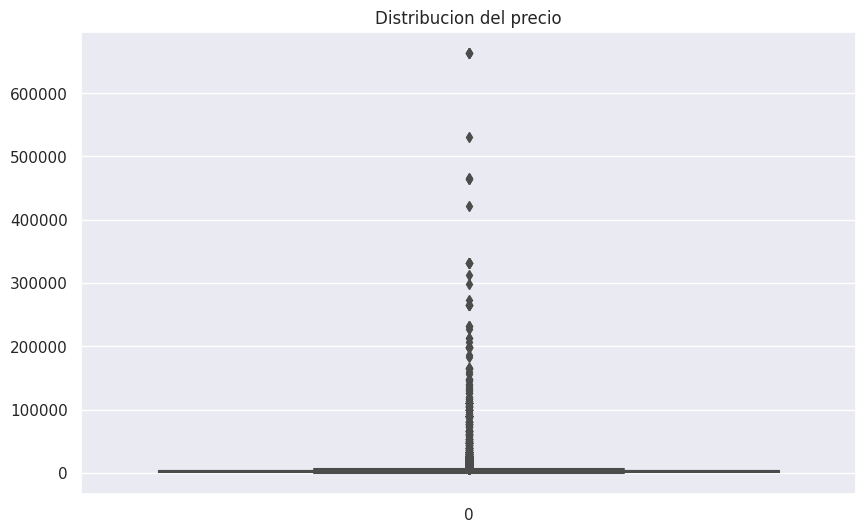

In [20]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(listings["price"])

<Axes: title={'center': 'Distribucion de las noches minimas de estadia'}, xlabel='minimum_nights', ylabel='Density'>

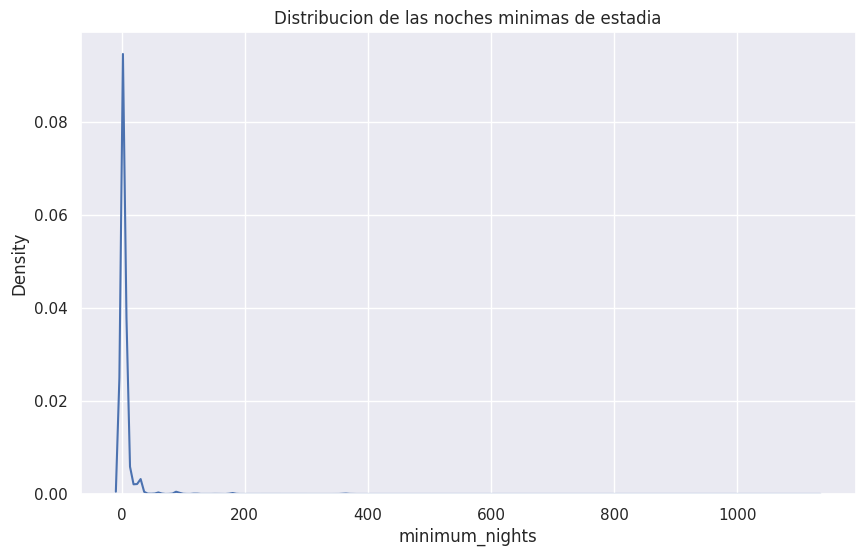

In [21]:
plt.figure(figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
#sns.histplot(listings["minimum_nights"], kde=True, stat="density", kde_kws=dict(cut=3))
sns.kdeplot(listings["minimum_nights"])

<Axes: title={'center': 'Distribucion de la cantidad de reviews'}, xlabel='reviews_per_month', ylabel='Density'>

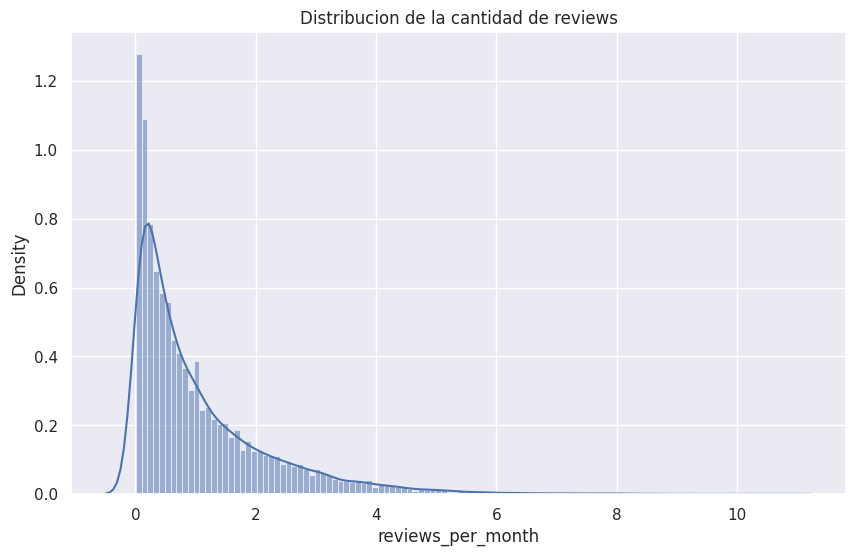

In [22]:
plt.figure(3, figsize=(10,6))
plt.title("Distribucion de la cantidad de reviews")
sns.histplot(listings["reviews_per_month"], kde=True, stat="density", kde_kws=dict(cut=3))

* Algunas Observaciones<br>

1- En el primer gráfico podemos ver que la distribucion del precio en $ es de $600,000 <br>
   Esto sugiere que hay una concentración de alojamientos en esta franja de precios.<br>
   
   2- En el segundo grafico podemos ver que la mayoría de los alojamientos permiten estadías cortas y no tienen requisitos mínimos de noches particularmente altos.<br>
   El valor de densidad de 0.08 en el eje 'y' indica que esta es la densidad de alojamientos en el rango de requisitos mínimos de noches que se muestra en el gráfico.<br>
   La dispersión en los requisitos mínimos de noches podría deberse a diversos factores, como el tipo de alojamiento (por ejemplo, casas, apartamentos, hoteles), la ubicación geográfica, la temporada o las políticas de los anfitriones. Esta variabilidad puede ofrecer opciones flexibles para los huéspedes que deseen estancias más cortas o más largas.

   3- En el tercero vemos la mayoria de los Reviews, en el eje x marcan entre 0 y 5, lo que sugiere que la mayoría de los alojamientos tienen una concentración de reseñas en ese rango. Esto podría indicar que la mayoría de los huéspedes están satisfechos con sus experiencias, ya que las calificaciones bajas son menos comunes.<br>
   La barra que sube a una densidad de 1.2 en el eje y indica que hay un grupo de alojamientos con un número significativamente mayor de reseñas en comparación con otros alojamientos.


* Limpiando posibles Outliers.

In [23]:
#Quitando valores extremos en el precio
p10 = np.percentile(listings["price"], 10)
p90 = np.percentile(listings["price"], 90)
df_airbnb = listings[(listings["price"] >= p10) & (listings["price"] <= p90)]

In [24]:
#Quitando valores extremos en la cantidad de noches minimas
p10 = np.percentile(listings["minimum_nights"], 10)
p90 = np.percentile(listings["minimum_nights"], 90)
listings = listings[(listings["minimum_nights"] >= p10) & (listings["minimum_nights"] <= p90)]

* Voy a volver a graficar.

<Axes: title={'center': 'Distribucion de las noches minimas de estadia'}, xlabel='minimum_nights', ylabel='Density'>

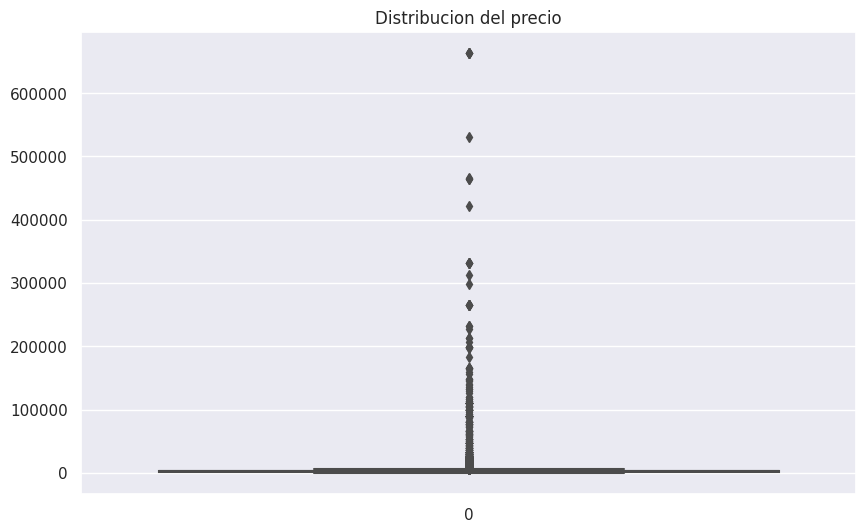

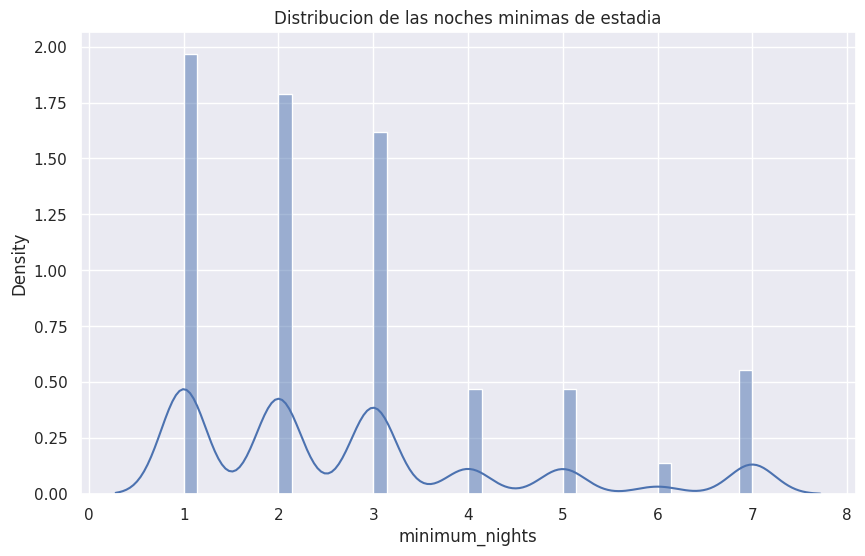

In [25]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(listings["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(3, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.histplot(listings["minimum_nights"], kde=True, stat="density", kde_kws=dict(cut=3))

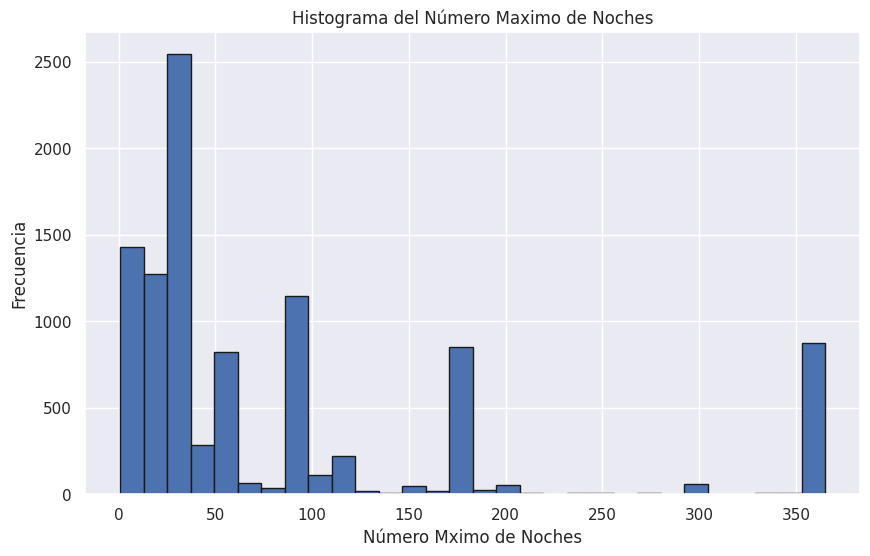

In [222]:
filtered_data = listings[listings['maximum_nights'] <= 365]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['maximum_nights'], bins=30, edgecolor='k')
plt.title('Histograma del Número Maximo de Noches')
plt.xlabel('Número Mximo de Noches')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Análisis de reseñas:

* He querido destacar la puntuación más alta de las reseñas en nuestro análisis. Al observar los datos, hemos identificado que la puntuación<br>
máxima otorgada en las reseñas es un indicador importante de la satisfacción de los huéspedes con los alojamientos.<br>

    Esto sugiere que algunos alojamientos han logrado recibir calificaciones excepcionales por parte de sus visitantes, lo que podría ser un indicativo de su calidad y servicio excepcionales.<br>

    Esta información resalta la importancia de ofrecer experiencias excepcionales a los huéspedes, ya que las reseñas positivas pueden influir significativamente en la decisión de otros viajeros al elegir un alojamiento.

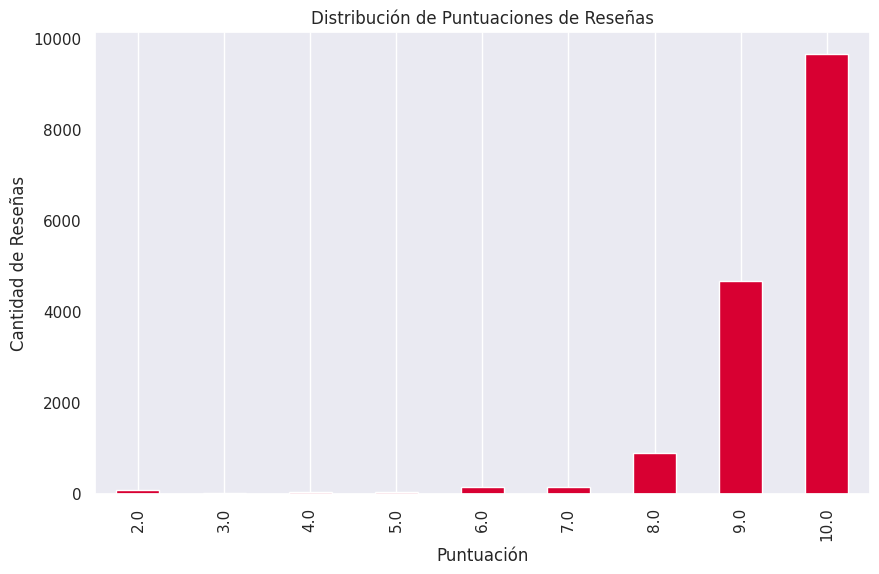

In [26]:
# Cambie los datos de la columna porque contenian números como texto.

listings['review_scores_value'] = pd.to_numeric(listings['review_scores_value'], errors='coerce')
#luego limpie la columna borrando los NaN.
listings.dropna(subset=['review_scores_value'], inplace=True)

# Agrupa los datos por 'review_scores_value' y cuenta la cantidad de entradas para cada valor
score_counts = listings['review_scores_value'].value_counts().sort_index()

# Crea el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', stacked=True, color='#D80032')
plt.title('Distribución de Puntuaciones de Reseñas')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Reseñas')
plt.grid(axis='y')
plt.show()


La visualización de la cantidad de alojamientos por barrio es una herramienta efectiva para identificar oportunidades de inversión en Airbnb. Este análisis permite identificar los barrios con una alta demanda de alojamientos, lo que puede ser útil para tomar decisiones informadas sobre dónde invertir en la plataforma. Al conocer la distribución de alojamientos por barrio, podemos enfocar nuestros esfuerzos de inversión en áreas con un mayor potencial de retorno.

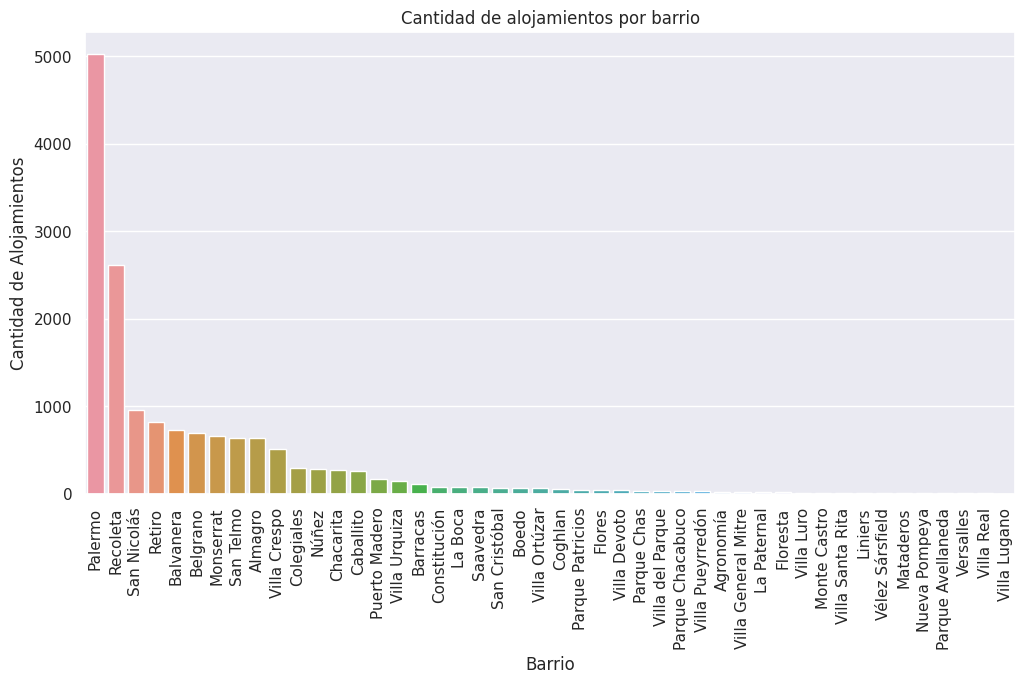

In [27]:
plt.figure(figsize=(12, 6))  
plt.title("Cantidad de alojamientos por barrio")
sns.countplot(data=listings, x='neighbourhood', order=listings['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)  
plt.xlabel("Barrio")
plt.ylabel("Cantidad de Alojamientos")
plt.show()

Al analizar los costos de alojamiento, observamos que el alquiler de una habitación en un hotel puede resultar en un gasto que supera en más del doble el costo de alternativas como una habitación privada, un apartamento o un cuarto compartido. Esta disparidad de precios resalta la ventaja competitiva de utilizar Airbnb como modelo de negocio.<br>

Airbnb ofrece una amplia gama de opciones de alojamiento que suelen ser más asequibles en comparación con los precios tradicionales de los hoteles. Esto hace que Airbnb sea una elección atractiva tanto para los viajeros que buscan una opción de hospedaje más económica como para los anfitriones que desean generar ingresos adicionales al alquilar sus propiedades. <br>

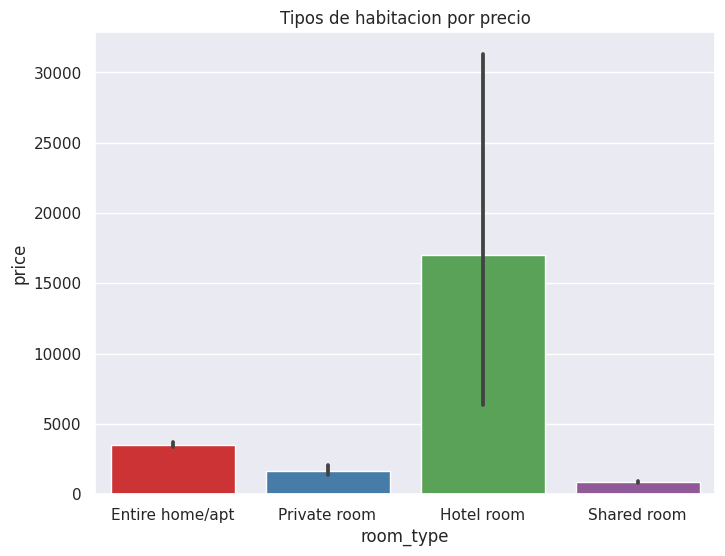

In [28]:
plt.figure(figsize=(8,6))
plt.title("Tipos de habitacion por precio")
sns.barplot(y='price',x='room_type',data=listings, palette="Set1")
plt.show()

Esta visualización geográfica tiene varias ventajas para el negocio de Airbnb. En primer lugar, nos permite identificar patrones de concentración de alojamientos en ciertos barrios, lo que puede ser útil para comprender las áreas de mayor demanda y popularidad. Además, puede ayudarnos a identificar áreas que podrían beneficiarse de una mayor inversión o promoción.

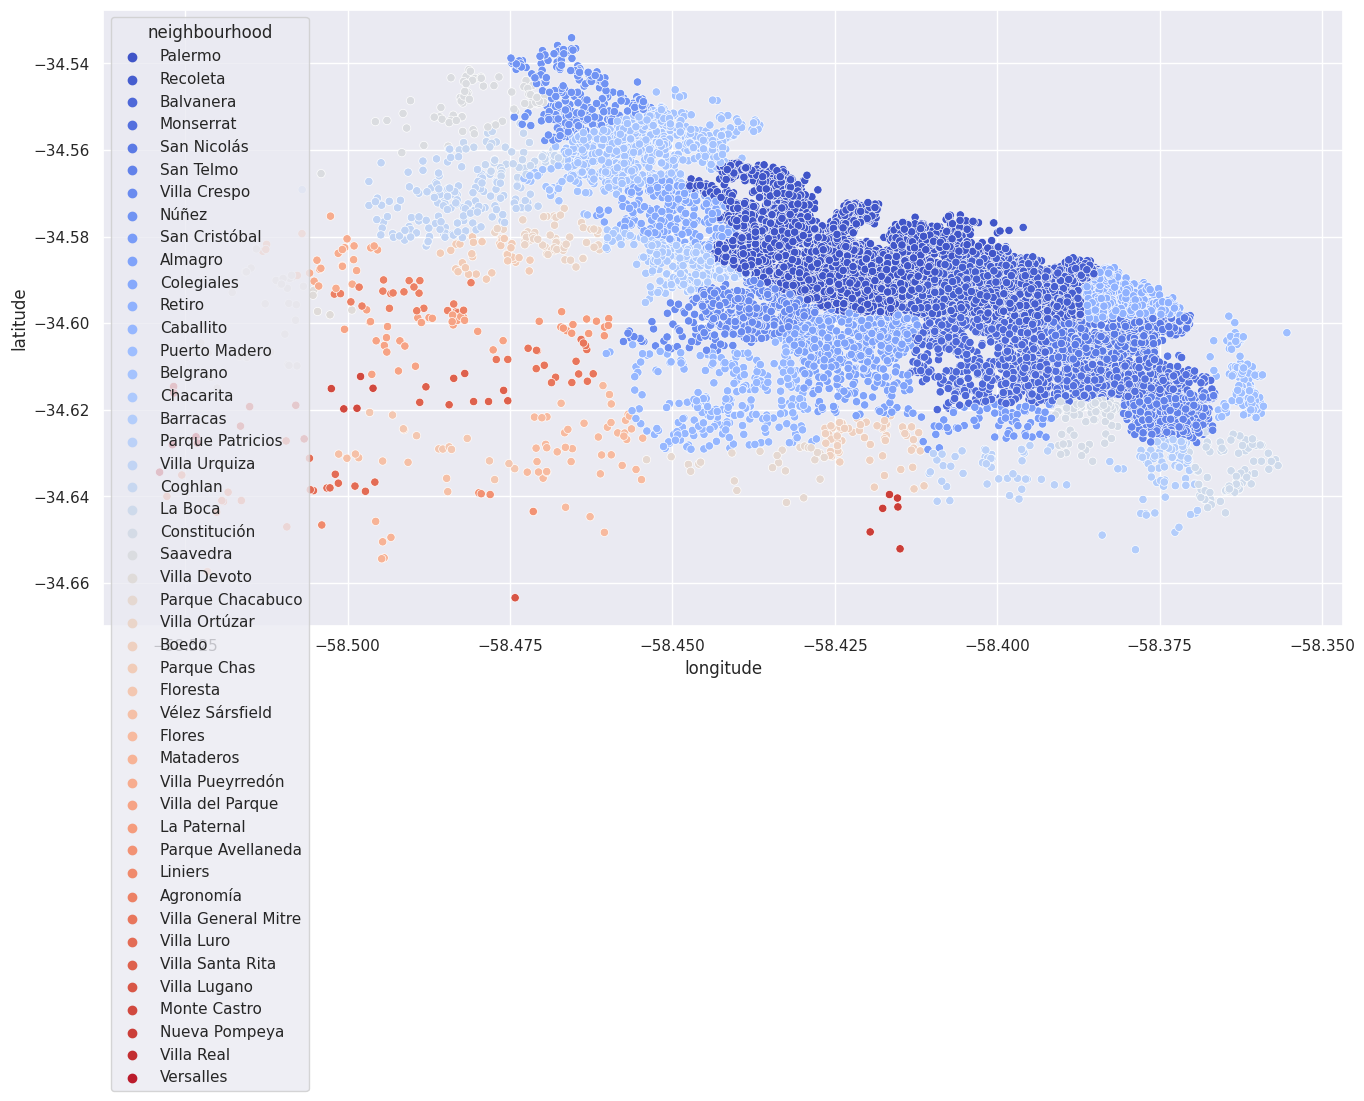

In [29]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=listings["latitude"],x=listings["longitude"],hue=listings["neighbourhood"],palette="coolwarm")
plt.show()

En nuestro dataset, hemos identificado columnas categóricas como 'barrios' y 'tipos de habitación'. Para facilitar el análisis, transformamos estas categorías en columnas individuales y asignamos un valor de 1 si el alojamiento pertenece a esa categoría y 0 si no. Esto nos permite realizar análisis más detallados y segmentados según la ubicación y el tipo de alojamiento.

In [30]:
#Voy agarrar columnas categoricas.
airbnb_cat = listings[["neighbourhood","room_type"]]
airbnb_cat.head()

,neighbourhood,room_type
0,Palermo,Entire home/apt
1,Recoleta,Private room
2,Palermo,Private room
4,Palermo,Private room
6,Palermo,Private room


In [31]:
dic_tipo_lugar = {
    "Private room":0,
    "Entire home/apt":1,
    "Shared room":2
}

In [34]:
#La función map se utiliza para aplicar una función o un mapeo a cada elemento de una secuencia 
# y crear una nueva secuencia con los resultados de esa operación
airbnb_cat.loc[:, 'dic_room_type'] = airbnb_cat['room_type'].map(dic_tipo_lugar)


In [35]:
airbnb_cat.head(15)

,neighbourhood,room_type,dic_room_type
0,Palermo,Entire home/apt,1.0
1,Recoleta,Private room,0.0
2,Palermo,Private room,0.0
4,Palermo,Private room,0.0
6,Palermo,Private room,0.0
7,Palermo,Entire home/apt,1.0
10,Balvanera,Private room,0.0
11,Monserrat,Entire home/apt,1.0
12,Monserrat,Entire home/apt,1.0
13,Monserrat,Entire home/apt,1.0
